In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing
import itertools

In [ ]:
#DATA_PATH = "final_tweets/"

train_df = pd.read_csv('train_df.csv')
valid_df = pd.read_csv('validate_df.csv')
test_df = pd.read_csv('test_df.csv')

full_dataset_df =  pd.read_csv('full_tweets_df.csv')

X_train = train_df['tweet_text']
Y_train = train_df['text_info']

X_valid = valid_df['tweet_text']
Y_valid = valid_df['text_info']

X_test = test_df['tweet_text']
Y_test = test_df['text_info']


In [ ]:
mes = []
for i in train_df['tweet_text']:
    mes.append(i.split())
word2vec_model = Word2Vec(mes, size=500, window=3, min_count=1, workers=16)
print(word2vec_model)


Word2Vec(vocab=13087, size=500, alpha=0.025)


In [ ]:
token = Tokenizer(7229)
token.fit_on_texts(train_df['tweet_text'])
text = token.texts_to_sequences(train_df['tweet_text'])
text = pad_sequences(text, 75)
print(text[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1302  249 2135   83  105
   100 1428   16    5    6]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    4   96 3138  743
   235  139  284   45    7]]


In [ ]:
token1 = Tokenizer(7229)
token1.fit_on_texts(test_df['tweet_text'])
text1 = token1.texts_to_sequences(test_df['tweet_text'])
text1 = pad_sequences(text1, 75)
print(text1[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    2    8   35
  2047  657 2048  128  210]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  516 2049
  2050 1225    3   18   66]]


In [ ]:
token2 = Tokenizer(7229)
token2.fit_on_texts(valid_df['tweet_text'])
text2 = token2.texts_to_sequences(valid_df['tweet_text'])
text2 = pad_sequences(text2, 75)
print(text2[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  351 1951 1193    1   50  841   17  650
    17 1194 1952 1953 1954]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  233  651  263    1   12    3
  1955  234 1956 1195  842]]


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(train_df['text_info'])
y = to_categorical(y)
y[:2]

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
le1 = preprocessing.LabelEncoder()
y1 = le1.fit_transform(test_df['text_info'])
y1 = to_categorical(y1)
y1[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
le2 = preprocessing.LabelEncoder()
y2 = le2.fit_transform(valid_df['text_info'])
y2 = to_categorical(y2)
y2[:2]

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train=np.array(text)
Y_train=y
X_test=np.array(text1)
Y_test=y1
X_valid=np.array(text2)
Y_valid=y2


FIRST TIME TRAIN

In [ ]:
keras_model = Sequential()
keras_model.add(word2vec_model.wv.get_keras_embedding(True))
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))
keras_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
keras_model.fit(X_train, Y_train, batch_size=16, epochs=8, validation_data=(X_valid, Y_valid))

Epoch 1/8
559/559 [==============================] - 37s 66ms/step - loss: 0.6200 - acc: 0.6779 - val_loss: 0.5974 - val_acc: 0.6975
Epoch 2/8
559/559 [==============================] - 36s 65ms/step - loss: 0.3883 - acc: 0.8343 - val_loss: 0.9580 - val_acc: 0.6557
Epoch 3/8
559/559 [==============================] - 36s 65ms/step - loss: 0.2179 - acc: 0.9203 - val_loss: 0.9576 - val_acc: 0.6296
Epoch 4/8
559/559 [==============================] - 36s 65ms/step - loss: 0.1141 - acc: 0.9579 - val_loss: 1.2997 - val_acc: 0.6290
Epoch 5/8
559/559 [==============================] - 37s 67ms/step - loss: 0.0693 - acc: 0.9765 - val_loss: 2.4374 - val_acc: 0.6228
Epoch 6/8
559/559 [==============================] - 38s 67ms/step - loss: 0.0500 - acc: 0.9837 - val_loss: 3.5300 - val_acc: 0.6134
Epoch 7/8
559/559 [==============================] - 37s 67ms/step - loss: 0.0361 - acc: 0.9888 - val_loss: 3.3815 - val_acc: 0.5967
Epoch 8/8
559/559 [==============================] - 38s 67ms/step - 

EVALUATE MODEL

60/60 [==============================] - 0s 5ms/step - loss: 3.2987 - acc: 0.5927


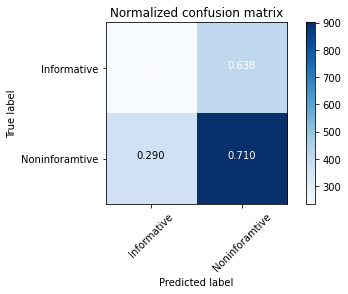

In [ ]:
predictions = evaluate(X_test, Y_test, keras_model)


In [ ]:
print(print_report(Y_test, predictions))

                precision    recall  f1-score   support

   Informative       0.39      0.36      0.38       646
Noninformative       0.69      0.71      0.70      1269

     micro avg       0.59      0.59      0.59      1915
     macro avg       0.54      0.54      0.54      1915
  weighted avg       0.59      0.59      0.59      1915
   samples avg       0.59      0.59      0.59      1915



SECOND TRAINING TRAIN DATA = TRAIN + VALIDATION DATA

In [ ]:
keras_model = Sequential()
keras_model.add(word2vec_model.wv.get_keras_embedding(True))
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))
keras_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
keras_model.fit(X_train, Y_train, batch_size=16, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
559/559 [==============================] - 37s 66ms/step - loss: 0.6448 - acc: 0.6624 - val_loss: 0.6397 - val_acc: 0.6627
Epoch 2/8
559/559 [==============================] - 37s 66ms/step - loss: 0.4864 - acc: 0.7748 - val_loss: 0.6796 - val_acc: 0.6736
Epoch 3/8
559/559 [==============================] - 37s 66ms/step - loss: 0.2640 - acc: 0.9033 - val_loss: 0.9475 - val_acc: 0.6073
Epoch 4/8
559/559 [==============================] - 37s 66ms/step - loss: 0.1515 - acc: 0.9462 - val_loss: 1.7457 - val_acc: 0.6120
Epoch 5/8
559/559 [==============================] - 37s 66ms/step - loss: 0.0852 - acc: 0.9710 - val_loss: 3.1618 - val_acc: 0.6104
Epoch 6/8
559/559 [==============================] - 37s 66ms/step - loss: 0.0525 - acc: 0.9825 - val_loss: 2.7599 - val_acc: 0.6240
Epoch 7/8
559/559 [==============================] - 37s 66ms/step - loss: 0.0381 - acc: 0.9874 - val_loss: 2.9475 - val_acc: 0.6172
Epoch 8/8
559/559 [==============================] - 37s 66ms/step - 

SAVE MODEL WEIGHTS

In [ ]:
keras_model.save('CNNacc')

INFO:tensorflow:Assets written to: CNNacc/assets


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.3f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("test.png")
def evaluate(X_test_f, Y_test_f, model):
    
    accr = model.evaluate(X_test_f,Y_test_f)
    predictions = model.predict(X_test_f)
    p = 0.5
    cm =  confusion_matrix(Y_test_f.argmax(axis=1), predictions.argmax(axis=1) > p)
    plot_confusion_matrix(cm, classes=["Informative","Noninforamtive"], normalize=True,
                      title='Normalized confusion matrix')
    return predictions


def print_report(Y, predictions):
    predictions[predictions >0.5] = 1
    predictions[predictions <=0.5] = 0
    return classification_report(Y, predictions, target_names=["Informative", "Noninformative"])

LOAD MODEL

60/60 [==============================] - 0s 4ms/step - loss: 4.4579 - acc: 0.6052


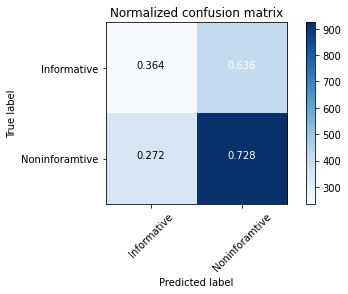

In [ ]:
from tensorflow import keras
model = keras.models.load_model('CNNacc')
predictions_test = evaluate(X_test, Y_test, keras_model)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
def print_report(Y, predictions):
    predictions[predictions >0.5] = 1
    predictions[predictions <=0.5] = 0
    return classification_report(Y, predictions, target_names=["Informative", "Noninformative"])

In [ ]:
print(print_report(Y_test, predictions_test))

                precision    recall  f1-score   support

   Informative       0.41      0.36      0.38       646
Noninformative       0.69      0.73      0.71      1269

     micro avg       0.61      0.61      0.61      1915
     macro avg       0.55      0.55      0.55      1915
  weighted avg       0.60      0.61      0.60      1915
   samples avg       0.61      0.61      0.61      1915



In [ ]:
#prediction = pd.DataFrame(predictions_test, columns=['tweet_id','tweet_prediction']).to_csv('prediction.csv')
#preddf=pd.read_csv('prediction.csv')